### Importing Libraries

To pull data from a CSV file, you must use the reader function to generate a reader object.  
NumPy is a package in Python used for Scientific Computing. NumPy package is used to perform different operations.  
Sklearn is a simple and efficient tool for data mining and data analysis built on numpy, scipy and matplotlib.  
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.  

In [1]:
import csv
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

The linear_model module imported from sklearn fits a linear model with coefficients, to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

### Initialising the 'dates' and 'prices' lists

A list is a data structure in Python that is a mutable, or changeable, ordered sequence of elements. Each element or value that is inside of a list is called an item.

In [2]:
dates = []
prices = []

### Defining the get_data() function

Step 1: Read the CSV file  
Step 2: Skip the column names of the CSV file  
Step 3: Read each row  
Step 4: From each row, add element of 1st column to 'dates' list  
Step 5: From each row, add element of 2nd column to 'prices' list  

In [3]:
def get_data(filename):
   with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
   return

### Defining the predict_prices() function

Step 1: Convert the 'dates' and 'prices' lists to nx1 matrices  
Step 2: Defining the linear regression model  
Step 3: Fitting the data points in the linear regression model  

#### When this function is called, it will:
Step 4: Scatter plot the initial data points in black.  
Step 5: Plot the best-fit line by the linear regression model in red.  
Step 6: Return as values:  
a. the next predicted price  
b. the regression coefficient  
c. the y-intercept, the constant.

In [4]:
def predict_price(dates, prices, x):
    dates = np.reshape(dates, (len(dates),1))
    prices = np.reshape(prices, (len(prices),1))
    
    linear_mod = linear_model.LinearRegression()
    linear_mod.fit(dates, prices)

    plt.scatter(dates, prices, color= 'black', label= 'Data') 
    plt.plot(dates, linear_mod.predict(dates), color= 'red', label= 'Linear model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

    return linear_mod.predict(x)[0][0], linear_mod.coef_[0][0], linear_mod.intercept_[0]

### Getting and reading the CSV file

Actually calling the get_data() function.

In [5]:
get_data('/Users/rounakbose/Git Local/goog.csv')
print ("Dates- ", dates)
print ("Prices- ", prices)

Dates-  [26, 25, 24, 23, 22, 19, 18, 17, 16, 12, 11, 10, 9, 8, 5, 4, 3, 2, 1]
Prices-  [708.58, 700.01, 688.92, 701.45, 707.45, 695.03, 710.0, 699.0, 692.98, 690.26, 675.0, 686.86, 672.32, 667.85, 703.87, 722.81, 770.22, 784.5, 750.46]


### Showing the results

1. The predicted stock price for a new date,  
2. The regression coefficient and the y-intercept constant,  
3. The scatter plot.

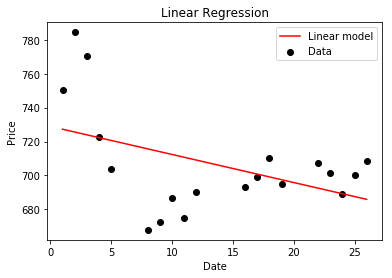


The stock open price for 29th Feb is: $ 680.9255197999166
The regression coefficient is  -1.6553551479783242 , and the constant is  728.9308190912881
the relationship equation between dates and prices is: price =  -1.6553551479783242 * date +  728.9308190912881


In [6]:
predicted_price, coefficient, constant = predict_price(dates, prices, 29)  
print ("\nThe stock open price for 29th Feb is: $", str(predicted_price))
print ("The regression coefficient is ", str(coefficient), ", and the constant is ", str(constant))
print ("the relationship equation between dates and prices is: price = ", str(coefficient), "* date + ", str(constant))

### Conclusion

Suffice it to say that actual stock market predictions will not be risk-free through this method.  
Even in the short-term, this method will not take into account non-linearities in the actual real-life problems to compute predictions.  
We can try advanced tools like the SVM, next, for short-term stock market predictions.